## Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [296]:
#Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [297]:
# load the dataset
filename = "http://bit.ly/w-data"
scores_orig = pd.read_csv(filename)


In [298]:
scores_orig.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [299]:
scores_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [300]:
scores_orig.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [301]:
scores_orig.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB7C4B48C8>,
      dtype=object)

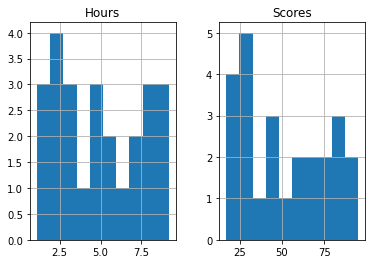

In [302]:
scores_orig.hist()

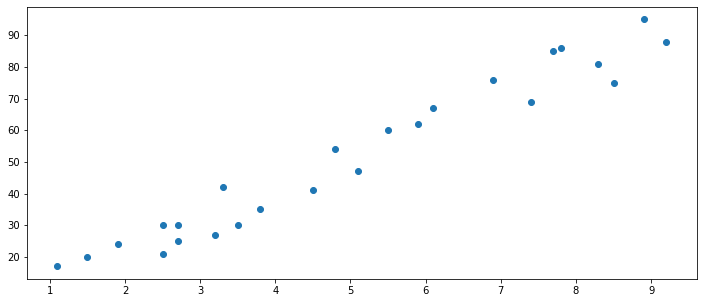

In [303]:
plt.figure(figsize=(12,5))
plt.scatter(scores_orig['Hours'], scores_orig['Scores'])
plt.show()

### The plot shows the positive linear relationship between the no of hours and score


In [304]:
#Splitting the dataset into target and features

x = scores_orig['Hours']
y = scores_orig['Scores']

x= np.array(x)
y = np.array(y)

In [305]:
#split the dataset into train and test

xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size= 0.2, random_state = 0)
xtrain= xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)

In [306]:
#Using linear Regression for the prediction model

lin_Reg = LinearRegression()

In [307]:
lin_Reg.fit(xtrain,ytrain)

LinearRegression()

In [308]:
lin_Reg.coef_

array([9.91065648])

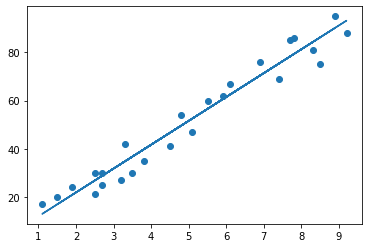

In [309]:
# Plotting the regression line
line = lin_Reg.coef_ * x + lin_Reg.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [310]:
ypred = lin_Reg.predict(xtest)

In [311]:
#comparisions between predicted and actual values

test_result = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})  

In [312]:
test_result

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### what will be the predicted score if the student studies 9.25hrs/day?

In [313]:
ycheck = lin_Reg.predict((np.array(9.25).reshape(1,-1)))
ycheck

array([93.69173249])

In [314]:
print("The student's expected score is : ", round(ycheck[0],2))

The student's expected score is :  93.69


## Model Evaluation

In [315]:
#Model Evaluation

r2_score= r2_score(ytest,ypred)
train_score  = lin_Reg.score(xtrain,ytrain)
test_score = lin_Reg.score(xtest, ytest)

In [318]:
print("R2_score : ", r2_score)
print("accuracy score on train data set : ", round(train_score*100 , 2))
print("accuracy score on test data set : ", round(test_score* 100, 2))

R2_score :  0.9454906892105355
accuracy score on train data set :  95.16
accuracy score on test data set :  94.55
